
# Time Series Analysis Final Project

## Introduction

This project report presents the Time Series Analysis conducted by Group 1 under the Statistics course at the Indian Institute of Technology. The analysis aims to study and analyze time-series data related to air pollution in a specific region. The dataset used for this analysis includes various air pollutant measurements collected at regular intervals.

### Team Members
- Shatrughna Chaurasia  (RollNo: 221417)
- Mohammad Saqib Ansari (RollNo: 221348)


## Dataset Description

The dataset used for the Time Series Analysis contains the following columns:
- Timestamp: Date and time of data collection
- PM10 (µg/m3): Concentration of suspended particulate matter with a diameter of 10 micrometers or smaller
- NO (µg/m3): Concentration of nitrogen monoxide
- PM2.5 (µg/m3): Concentration of fine particulate matter with a diameter of 2.5 micrometers or smaller
- NO2 (µg/m3): Concentration of nitrogen dioxide
- NOX (ppb): Concentration of nitrogen oxides
- CO (mg/m3): Concentration of carbon monoxide
- SO2 (µg/m3): Concentration of sulfur dioxide
- NH3 (µg/m3): Concentration of ammonia
- Ozone (µg/m3): Concentration of ozone
- Benzene (µg/m3): Concentration of benzene



In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.interpolate import interp1d
import statsmodels.api as sm

warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# URL of the raw CSV file
url = "https://raw.githubusercontent.com/FuTSA23/time-series-analysis-datasets/da059e9f430e1337f7b437609ad2488480465882/Complete_Blasting_info%20(1).csv"

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(url, delimiter=',')

#### 0.0 Exploratory Data Analysis

In [2]:
df.head()

,Unnamed: 0,PM10 (µg/m3),Time,Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
0,0,95.0,00:00:00,2023-02-01,14.484070,35.0,90.1,56.2,0.31,11.986833,17.7,28.1,0.4
1,1,95.0,00:15:00,2023-02-01,14.484070,35.0,88.0,55.1,0.33,11.986833,18.3,27.1,0.4
2,2,95.0,00:30:00,2023-02-01,15.835914,35.0,87.7,55.2,0.38,10.912796,19.7,24.9,0.4
3,3,122.0,00:45:00,2023-02-01,15.914518,34.0,88.9,55.7,0.38,10.613291,21.3,21.9,0.4
4,4,122.0,01:00:00,2023-02-01,16.035640,34.0,90.0,55.8,0.38,7.362361,22.3,16.7,0.4


In [3]:
# Combine 'Date' and 'Time' columns into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [4]:
# Drop the separate 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [5]:
# Set 'DateTime' column as the index
df.set_index('DateTime', inplace=True)

In [6]:
 df = df.drop(['Unnamed: 0'] , axis = 1)

In [7]:
 df.head(10)

,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
DateTime,,,,,,,,,,
2023-02-01 00:00:00,95.0,14.484070,35.0,90.1,56.2,0.31,11.986833,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,14.484070,35.0,88.0,55.1,0.33,11.986833,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,15.835914,35.0,87.7,55.2,0.38,10.912796,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,15.914518,34.0,88.9,55.7,0.38,10.613291,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,16.035640,34.0,90.0,55.8,0.38,7.362361,22.3,16.7,0.4
2023-02-01 01:15:00,122.0,17.497777,34.0,90.2,55.9,0.37,8.494481,22.7,16.1,0.4
2023-02-01 01:30:00,122.0,17.121285,34.0,88.9,55.4,0.34,8.326684,23.1,22.5,0.4
2023-02-01 01:45:00,90.0,15.532830,35.0,88.9,55.2,0.35,8.612863,23.5,20.5,0.4
2023-02-01 02:00:00,90.0,19.465702,35.0,88.9,55.9,0.34,9.272343,23.1,22.8,0.4


In [8]:
# sdimension of the data
df.shape

(8640, 10)

In [9]:
# checking the null values
df.isnull().sum()

PM10 (µg/m3)       0
NO (µg/m3)         0
PM2.5 (µg/m3)      0
NO2 (µg/m3)        0
NOX (ppb)          0
CO (mg/m3)         0
SO2 (µg/m3)        0
NH3 (µg/m3)        0
Ozone (µg/m3)      0
Benzene (µg/m3)    0
dtype: int64

#### 0.1   Descriptive Statistics

In [10]:
# Calculate decriptive statistics
descriptive_stats = df.describe()

# Display the result
print(descriptive_stats)

       PM10 (µg/m3)   NO (µg/m3)  PM2.5 (µg/m3)  NO2 (µg/m3)    NOX (ppb)  \
count   8640.000000  8640.000000    8640.000000  8640.000000  8640.000000   
mean     165.140621    14.269630      74.626459    56.128353    42.457154   
std      128.089107    17.986445      54.992383    20.328553    22.129798   
min      -13.488183     0.100000       3.000000     0.200000     4.200000   
25%       79.000000     4.000000      36.000000    39.575000    25.100000   
50%      127.000000     6.600000      59.000000    53.800000    37.500000   
75%      208.000000    17.121285     100.000000    71.500000    53.300000   
max      847.000000   157.500000     474.000000   106.900000   165.200000   

        CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)  Ozone (µg/m3)  Benzene (µg/m3)  
count  8640.000000  8640.000000  8640.000000    8640.000000      8640.000000  
mean      1.392857    33.727472    13.160495      35.765681         0.177505  
std       0.626985    38.878154     6.095797      26.549469         0

### 1.1 focuses on visualizing the multivariate time series data.

#### 1.1.0 demonstrates the process of plotting all observations in a single graph

<Figure size 864x432 with 0 Axes>

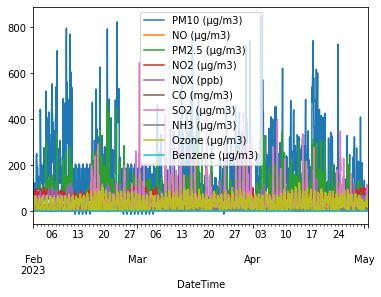

In [11]:
# Set the figure size
plt.figure(figsize=(12, 6))  # Width: 12 inches, Height: 6 inches

# Plot all observations in a single graph
df.plot()

# Show the plot
plt.show()

#### 1.1.1 Grid plot

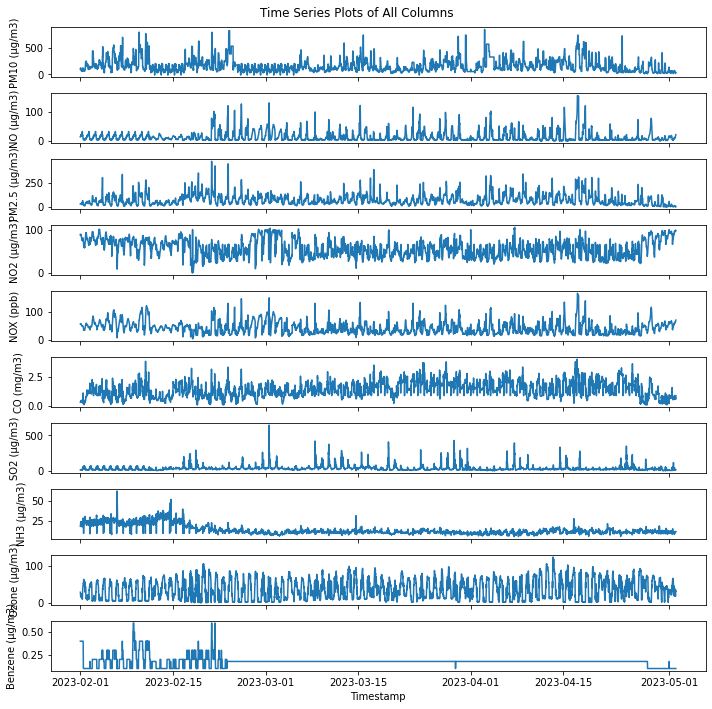

In [12]:
# Set up the subplots
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 10), sharex=True)

# Plot each column on its respective subplot
for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column])
    axes[i].set_ylabel(column)

# Set the x-axis label for the last subplot
axes[-1].set_xlabel('Timestamp')

# Add a common title for all subplots
plt.suptitle('Time Series Plots of All Columns')

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

#### 1.1.2  Stacked Area Plot

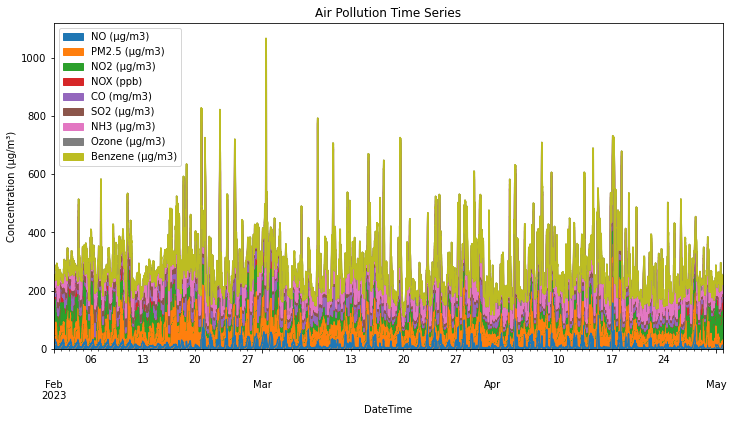

In [13]:
# Create an area plot for all columns except 'PM10 (µg/m3)'
df.drop('PM10 (µg/m3)', axis=1).plot.area(figsize=(12, 6), xlabel='DateTime', ylabel='Concentration (µg/m³)', title='Air Pollution Time Series')

# Show the plot
plt.show()

#### 1.1.3 Histogram of variables

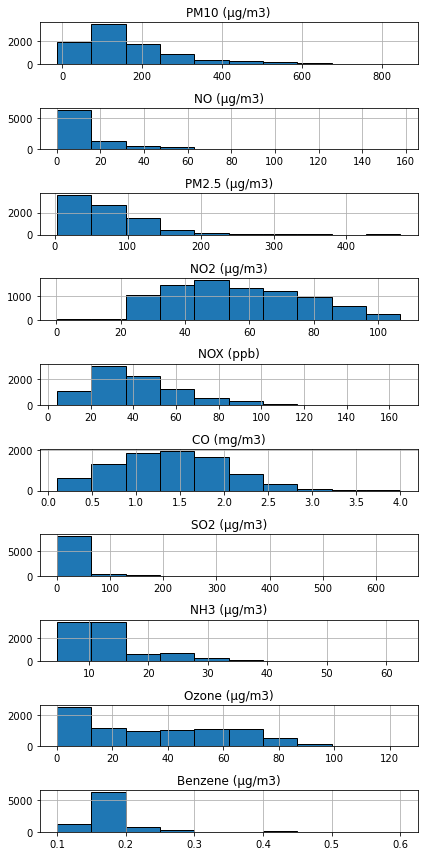

In [14]:
# Create a grid of histograms for all columns
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(6, 12))
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(column)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### 1.2 The relationship between the air pollutants with each other by visualtizations

#### 1.2.0 Correlation Matrix

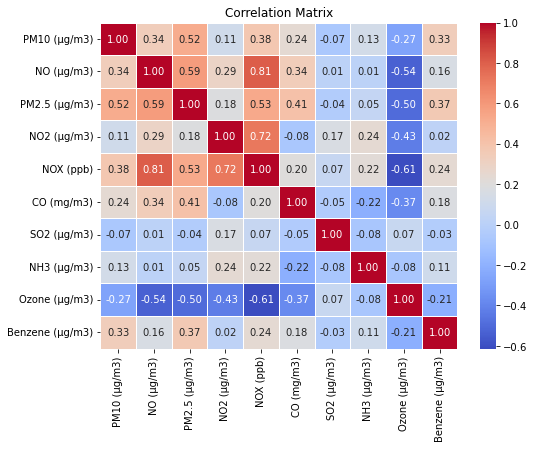

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

# Show the plot
plt.show()

##### Upon observation, it is evident that there exists a significant positive relationship between NOX and NO, which suggests the presence of multicollinearity.

#### 1.2.1 Pair-wise Plotting the different pollutants

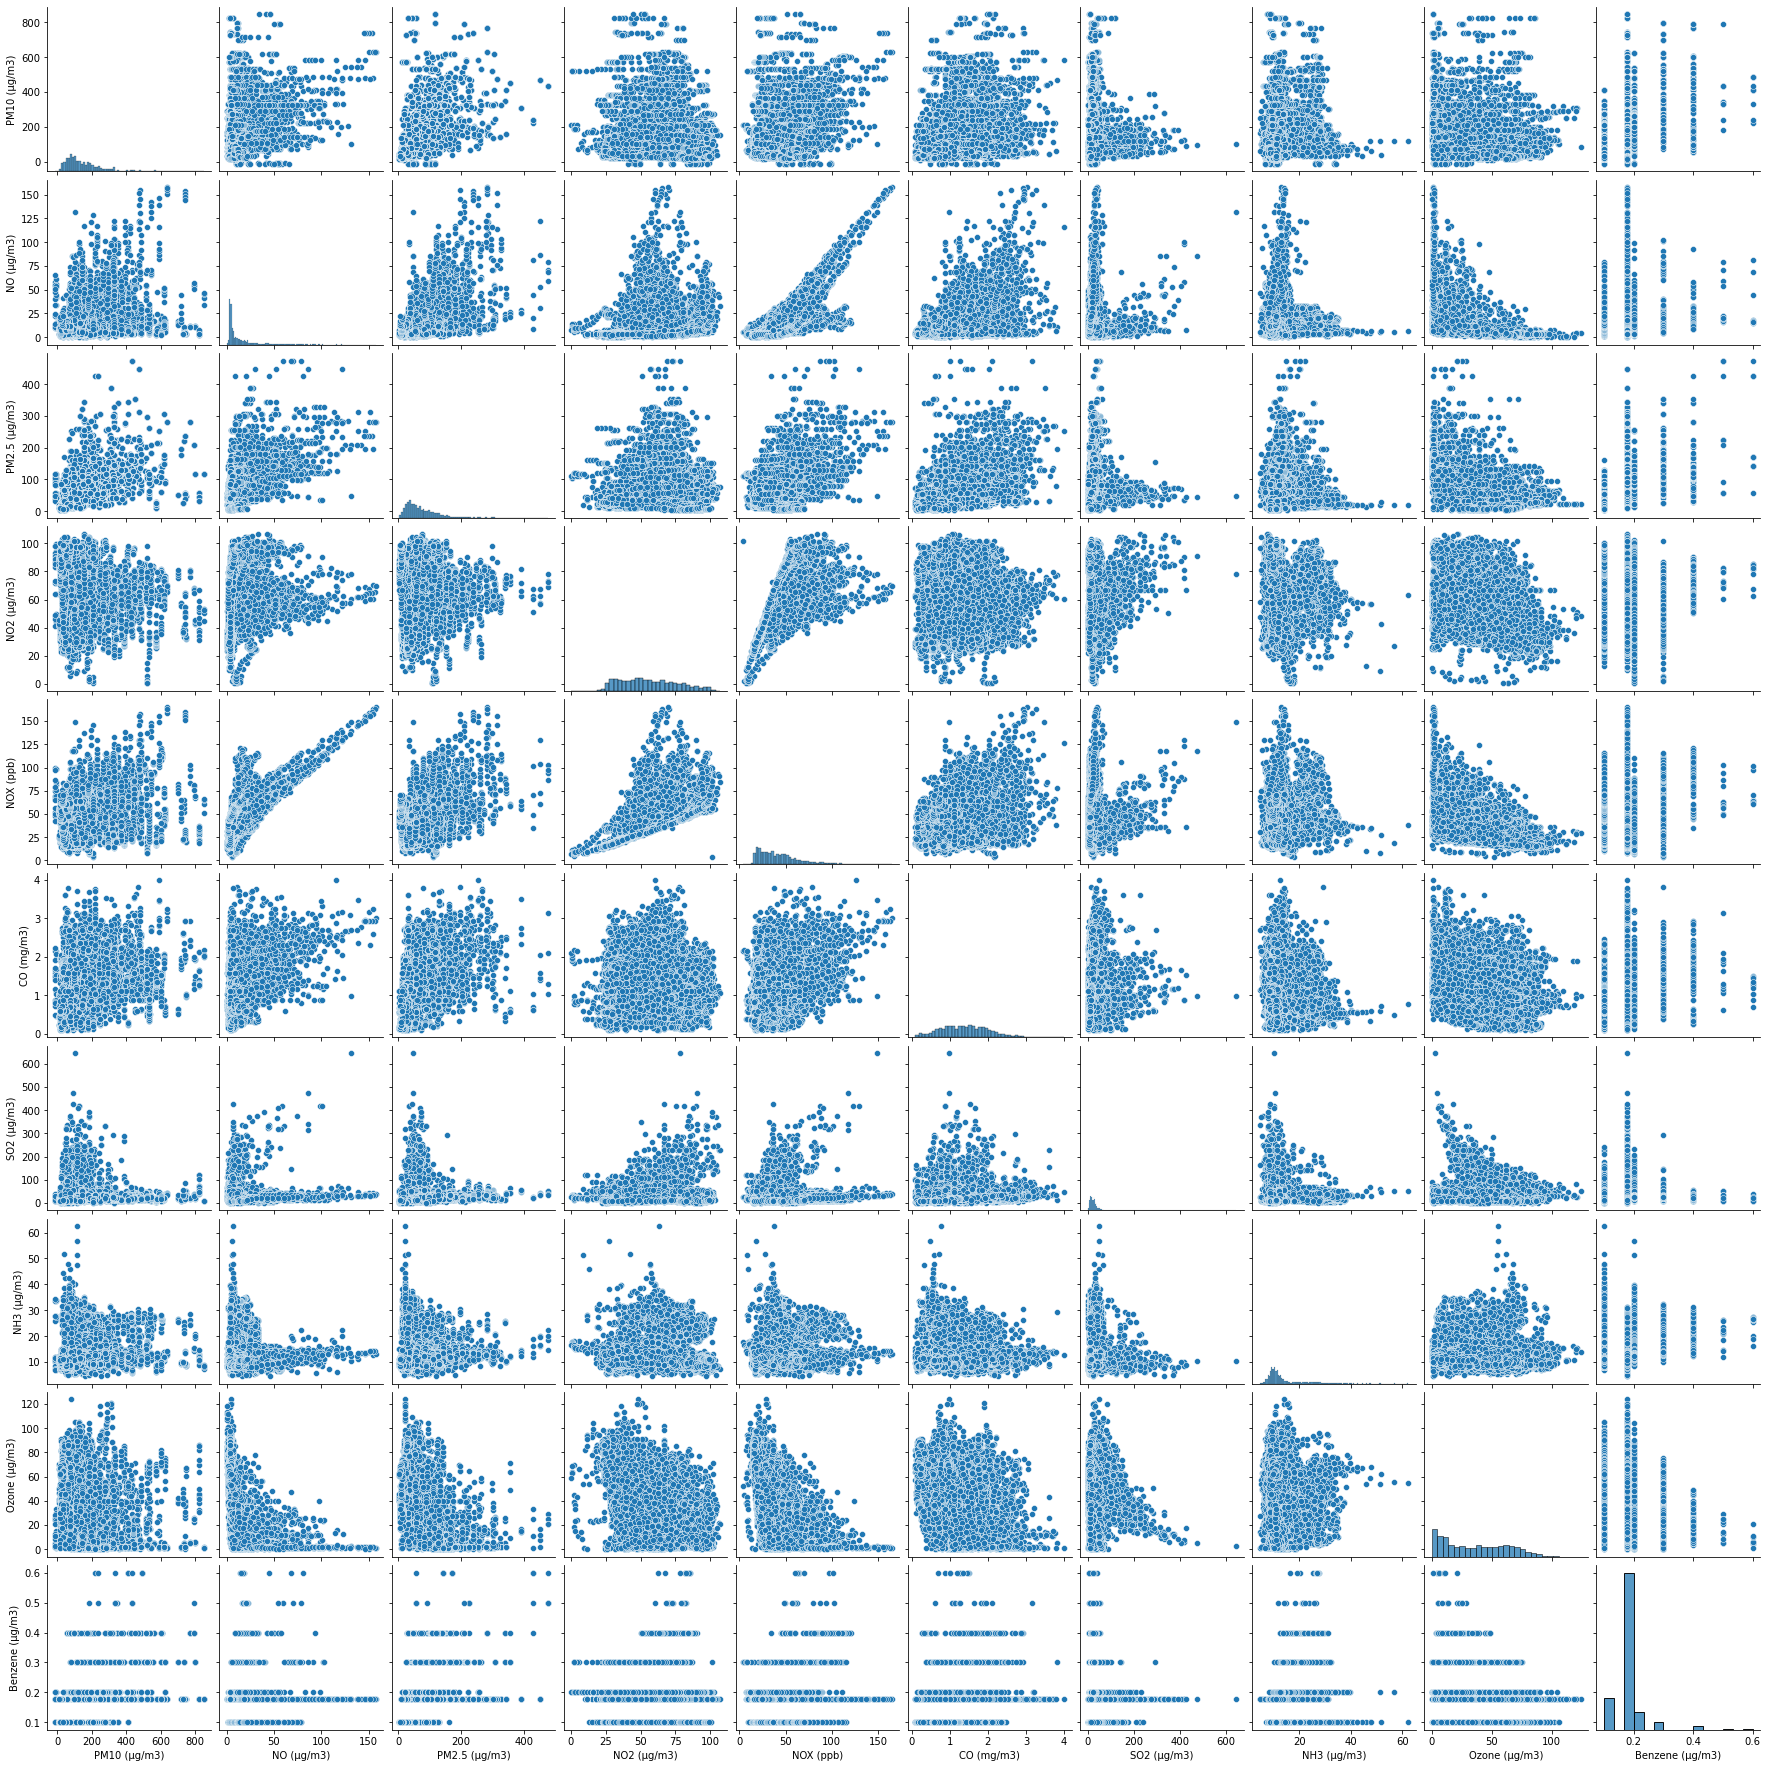

In [16]:
sns.pairplot(df)

### 1.2.2 The blasting time in Coal India typically falls between 13:45 PM to 14:45 PM and significantly impacts air pollution. Therefore, we will compare the two datasets and draw conclusions based on the analysis.

In [17]:
# Extract rows between 13:45 PM and 14:45 PM
new_df = df.between_time('13:45', '14:45')
new_df.head()


,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
DateTime,,,,,,,,,,
2023-02-01 13:45:00,73.0,4.647741,18.0,59.9,34.8,0.31,49.421488,20.5,56.9,0.1
2023-02-01 14:00:00,73.0,4.854775,18.0,62.4,36.2,0.30,53.211752,20.7,56.8,0.1
2023-02-01 14:15:00,73.0,5.469984,18.0,61.1,35.0,0.31,36.971376,21.5,57.1,0.1
2023-02-01 14:30:00,73.0,5.736887,18.0,59.0,34.0,0.34,29.556898,22.0,55.0,0.1
2023-02-01 14:45:00,63.0,6.123021,14.0,59.2,34.0,0.38,27.448166,20.8,56.3,0.1


In [18]:
# Observations for the rest of the time
new_df_1 = df.between_time('14:46' , '13:44')
new_df_1.head()

,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
DateTime,,,,,,,,,,
2023-02-01 00:00:00,95.0,14.484070,35.0,90.1,56.2,0.31,11.986833,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,14.484070,35.0,88.0,55.1,0.33,11.986833,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,15.835914,35.0,87.7,55.2,0.38,10.912796,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,15.914518,34.0,88.9,55.7,0.38,10.613291,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,16.035640,34.0,90.0,55.8,0.38,7.362361,22.3,16.7,0.4


#### Visualizing the new dataset of observations b/w 13:45 to 14:45

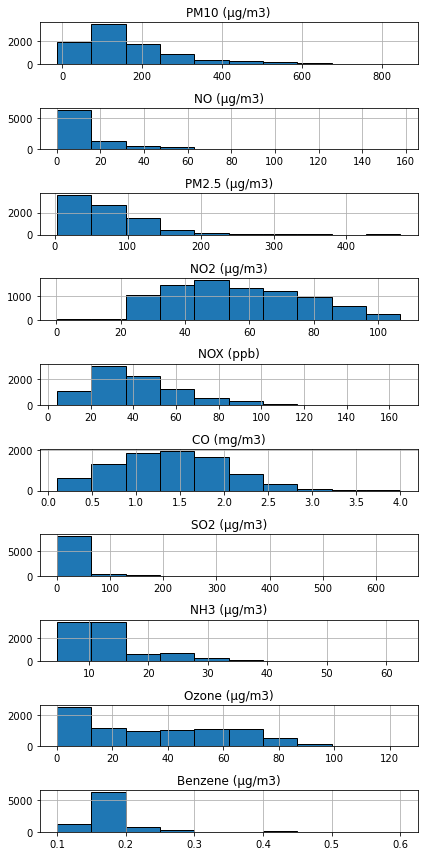

In [19]:
# Create a grid of histograms for all columns
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(6, 12))
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(column)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### 1.3.0 Let us look at the Q-Q Plots to determine if the columns follow a normal distribution.


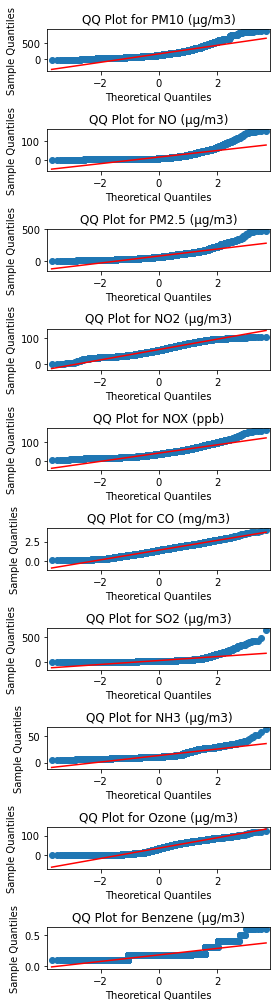

In [20]:
# Create QQ plots for all columns
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(4, 14))
for i, column in enumerate(df.columns):
    sm.qqplot(df[column], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot for {column}')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Based on the Q-Q plots and histograms, we can deduce that PM2.5, CO, and Ozone pollutants exhibit a relatively close approximation to a normal distribution.

### 2.0.0 Comparison of the Descriptive Statistics of the two datasets

In [21]:
new_df.describe()


,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,97.693250,5.490348,34.181804,47.803924,29.993426,1.055087,51.798855,12.715081,66.428793,0.157137
std,73.507027,7.259741,18.551560,20.433826,14.951182,0.542093,59.394849,7.076697,16.337413,0.034589
min,15.000000,0.200000,4.000000,12.700000,9.700000,0.110000,0.500000,5.100000,8.100000,0.100000
25%,58.250000,3.300000,21.000000,29.500000,18.225000,0.660000,17.750000,8.700000,60.125000,0.100000
50%,84.000000,3.900000,31.000000,42.150000,25.950000,0.965000,30.300000,10.100000,67.850000,0.177505
75%,123.000000,5.200000,43.750000,61.175000,36.075000,1.440000,63.550000,12.275000,76.400000,0.177505
max,570.000000,60.800000,102.000000,105.800000,100.900000,2.750000,393.200000,47.700000,105.200000,0.200000


In [22]:
new_df_1.describe()

,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,168.846521,14.752009,76.848693,56.585740,43.141974,1.411416,32.734539,13.184968,34.080895,0.178624
std,129.415702,18.273803,55.467537,20.224937,22.257075,0.626088,37.178138,6.036831,25.970518,0.053191
min,-13.488183,0.100000,3.000000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,82.000000,4.100000,37.000000,40.300000,25.600000,0.950000,14.899626,9.400000,10.400000,0.177505
50%,130.644482,7.090766,62.000000,54.300000,38.600000,1.410000,23.800000,11.000000,30.200000,0.177505
75%,216.750000,17.900000,103.000000,71.900000,54.200000,1.850000,35.400000,14.000000,55.500000,0.177505
max,847.000000,157.500000,474.000000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000


In [23]:
 new_df.median()

PM10 (µg/m3)       84.000000
NO (µg/m3)          3.900000
PM2.5 (µg/m3)      31.000000
NO2 (µg/m3)        42.150000
NOX (ppb)          25.950000
CO (mg/m3)          0.965000
SO2 (µg/m3)        30.300000
NH3 (µg/m3)        10.100000
Ozone (µg/m3)      67.850000
Benzene (µg/m3)     0.177505
dtype: float64

In [24]:
new_df_1.median()

PM10 (µg/m3)       130.644482
NO (µg/m3)           7.090766
PM2.5 (µg/m3)       62.000000
NO2 (µg/m3)         54.300000
NOX (ppb)           38.600000
CO (mg/m3)           1.410000
SO2 (µg/m3)         23.800000
NH3 (µg/m3)         11.000000
Ozone (µg/m3)       30.200000
Benzene (µg/m3)      0.177505
dtype: float64

#### We can observe that the median value of SO2 and Ozone pollutant during 13:45 to 14:45 is significanly greater than rest of the day. This gives us a clear indication that, during the open pit-blasting, Ozone and Sulphur Oxide levels in air rises

#### 3.0.0  Decomposition of Time Series

#### 3.1.0 Let us study the time series data of Ozone Pollutant

In [25]:
univ_df = pd.DataFrame(new_df['Ozone (µg/m3)'])


<AxesSubplot:xlabel='DateTime'>

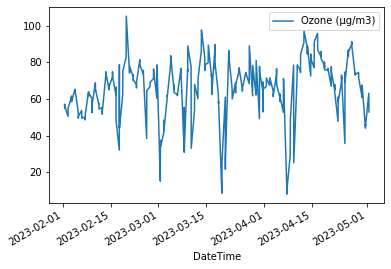

In [26]:
univ_df.plot()

### 3.2.0 Checking for Stationarity by adfuller Test


In [27]:
def adfuller_test(x):
    result = adfuller(x)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
    if result[1] <= 0.05:
        print("Reject null hypothesis - The data is stationary.")
    else:
        print("Accept null hypothesis - The data is non-stationary.")

In [28]:
adfuller_test(new_df['Ozone (µg/m3)'])

ADF Test Statistic: -7.005429322242349
p-value: 7.142548345098416e-10
#Lags Used: 0
Number of Observations Used: 449
Reject null hypothesis - The data is stationary.


#### Thus, by adfuller test, the time series is stationary.


<Figure size 576x432 with 0 Axes>

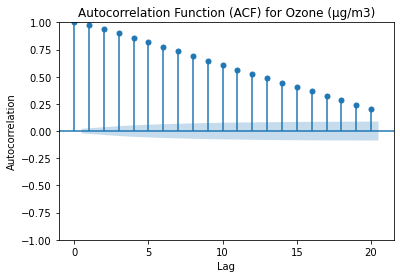

In [29]:
# Plot ACF for 'Ozone (µg/m3)' with lags up to 20
plt.figure(figsize=(8, 6))
plot_acf(df['Ozone (µg/m3)'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Ozone (µg/m3)')
plt.show()

<Figure size 576x432 with 0 Axes>

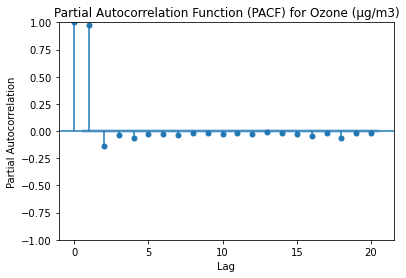

In [30]:
# Plot PACF for 'Ozone (µg/m3)' with lags up to 20
plt.figure(figsize=(8, 6))
plot_pacf(df['Ozone (µg/m3)'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) for Ozone (µg/m3)')
plt.show()

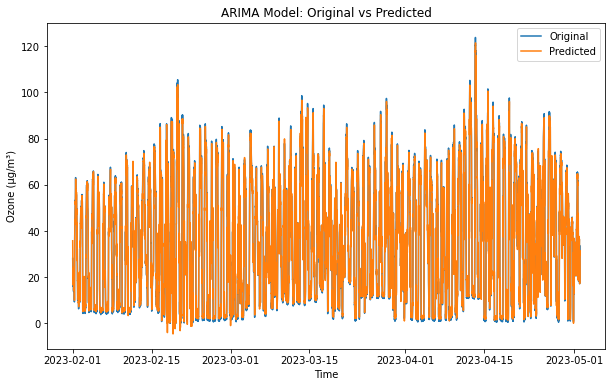

In [31]:
# Assuming you have selected the column for ARIMA modeling, let's use 'Ozone (µg/m3)' as an example
time_series_data = df['Ozone (µg/m3)']

# Create an instance of the ARIMA model with appropriate order values
p = 1  # Order of the autoregressive (AR) component
d = 0  # Order of differencing (I) component
q = 1  # Order of the moving average (MA) component
model = ARIMA(time_series_data, order=(p, d, q))

# Fit the model to the data
model_fit = model.fit()

# Generate predictions from the fitted model
predictions = model_fit.predict()

# Plot the original data and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Original')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('ARIMA Model: Original vs Predicted')
plt.xlabel('Time')
plt.ylabel('Ozone (µg/m³)')
plt.show()


## 4.0.0 Interpolation

### 4.1.0 Linear Interpolation

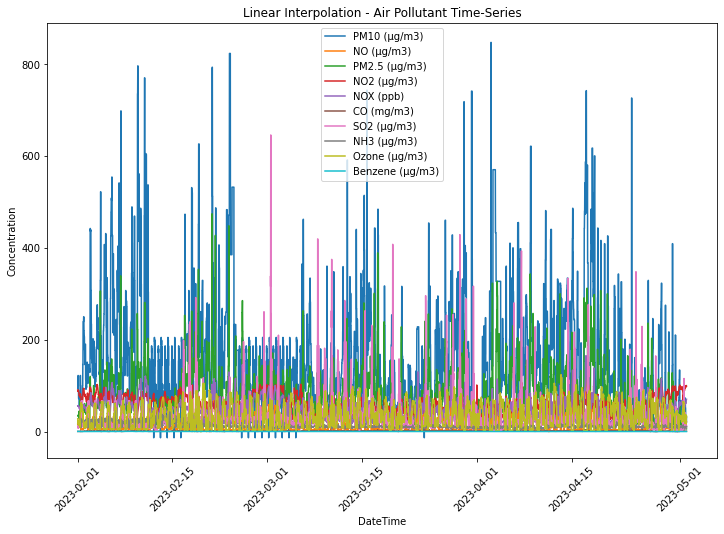

In [34]:
# Step 1: Linear Interpolation
linear_interpolated_df = df.interpolate(method='linear')

# Step 2: Plotting Time-Series for each air pollutant
pollutants = ['PM10 (µg/m3)', 'NO (µg/m3)', 'PM2.5 (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']

plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    plt.plot(linear_interpolated_df.index, linear_interpolated_df[pollutant], label=pollutant)

plt.xlabel('DateTime')
plt.ylabel('Concentration')
plt.title('Linear Interpolation - Air Pollutant Time-Series')
plt.legend()
plt.xticks(rotation=45)
plt.show()


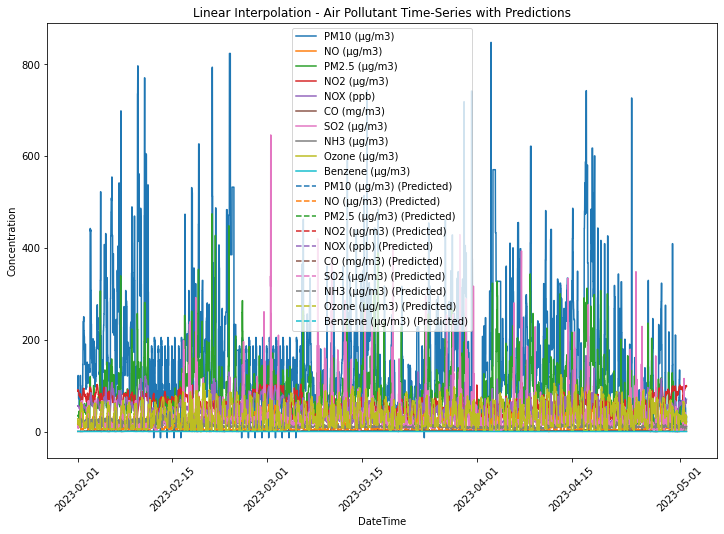

In [35]:
# Step 2: Predicting values using Linear Interpolation
start_time = '2023-07-01 00:00:00'
end_time = '2023-07-15 00:00:00'
prediction_period = pd.date_range(start=start_time, end=end_time, freq='H')
predicted_df = linear_interpolated_df.reindex(prediction_period)

# Step 3: Plotting the predicted values
pollutants = ['PM10 (µg/m3)', 'NO (µg/m3)', 'PM2.5 (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']

plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    plt.plot(linear_interpolated_df.index, linear_interpolated_df[pollutant], label=pollutant)

for pollutant in pollutants:
    plt.plot(predicted_df.index, predicted_df[pollutant], linestyle='dashed', label=f'{pollutant} (Predicted)')

plt.xlabel('DateTime')
plt.ylabel('Concentration')
plt.title('Linear Interpolation - Air Pollutant Time-Series with Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 4.2.0 Cubic Interpolation

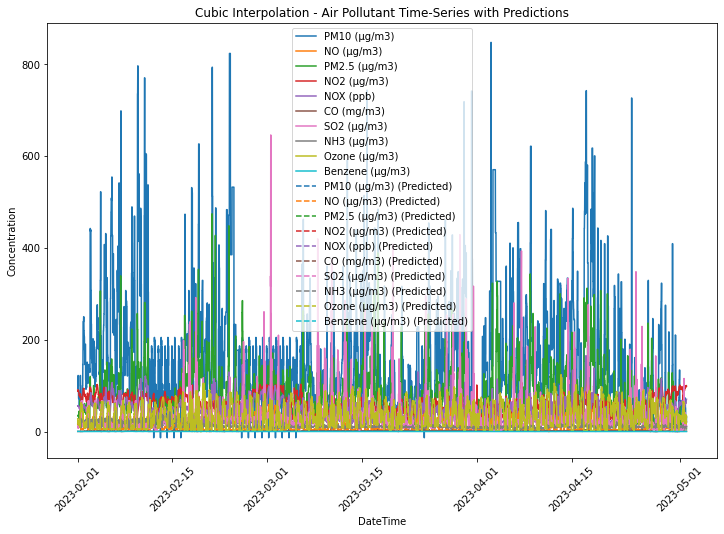

In [37]:
 #Step 1: Cubic Interpolation
cubic_interpolated_df = df.interpolate(method='cubic')

# Step 2: Predicting values using Cubic Interpolation
start_time = '2023-07-01 00:00:00'
end_time = '2023-07-15 00:00:00'
prediction_period = pd.date_range(start=start_time, end=end_time, freq='H')
predicted_df = cubic_interpolated_df.reindex(prediction_period)

# Step 3: Plotting the predicted values
pollutants = ['PM10 (µg/m3)', 'NO (µg/m3)', 'PM2.5 (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']

plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    plt.plot(cubic_interpolated_df.index, cubic_interpolated_df[pollutant], label=pollutant)

for pollutant in pollutants:
    plt.plot(predicted_df.index, predicted_df[pollutant], linestyle='dashed', label=f'{pollutant} (Predicted)')

plt.xlabel('DateTime')
plt.ylabel('Concentration')
plt.title('Cubic Interpolation - Air Pollutant Time-Series with Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 4.3.0 Spline Interpolation

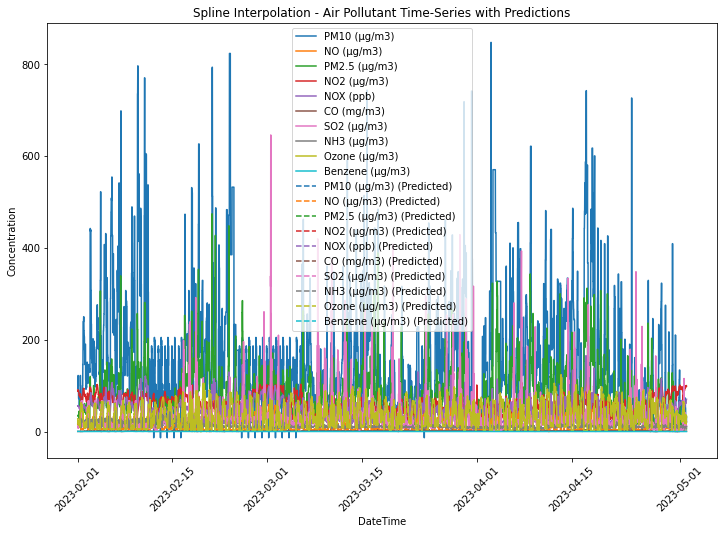

In [38]:
# Step 1: Spline Interpolation
spline_interpolated_df = df.interpolate(method='spline', order=3)

# Step 2: Predicting values using Spline Interpolation
start_time = '2023-07-01 00:00:00'
end_time = '2023-07-15 00:00:00'
prediction_period = pd.date_range(start=start_time, end=end_time, freq='H')
predicted_df = spline_interpolated_df.reindex(prediction_period)

# Step 3: Plotting the predicted values
pollutants = ['PM10 (µg/m3)', 'NO (µg/m3)', 'PM2.5 (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']

plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    plt.plot(spline_interpolated_df.index, spline_interpolated_df[pollutant], label=pollutant)

for pollutant in pollutants:
    plt.plot(predicted_df.index, predicted_df[pollutant], linestyle='dashed', label=f'{pollutant} (Predicted)')

plt.xlabel('DateTime')
plt.ylabel('Concentration')
plt.title('Spline Interpolation - Air Pollutant Time-Series with Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### 4.4.0 Prediction using Interpolation

In [43]:

# Step 2: Linear Interpolation
linear_interpolated_df = df.interpolate(method='linear')

# Step 3: Cubic Interpolation
cubic_interpolated_df = df.interpolate(method='cubic')

# Step 4: Spline Interpolation
spline_interpolated_df = df.interpolate(method='spline', order=3)

# Print the predicted values for each interpolation method
print("Linear Interpolation - Predicted Values:")
print(linear_interpolated_df.tail())

print("\nCubic Interpolation - Predicted Values:")
print(cubic_interpolated_df.tail())

print("\nSpline Interpolation - Predicted Values:")
print(spline_interpolated_df.tail())


Linear Interpolation - Predicted Values:
                     PM10 (µg/m3)  NO (µg/m3)  PM2.5 (µg/m3)  NO2 (µg/m3)  \
DateTime                                                                    
2023-05-01 22:45:00          19.0        17.9           11.0        100.0   
2023-05-01 23:00:00          19.0        17.9           11.0        100.0   
2023-05-01 23:15:00          19.0        19.6           11.0        100.2   
2023-05-01 23:30:00          19.0        20.8           11.0        100.2   
2023-05-01 23:45:00          32.0        21.8            6.0         98.8   

                     NOX (ppb)  CO (mg/m3)  SO2 (µg/m3)  NH3 (µg/m3)  \
DateTime                                                               
2023-05-01 22:45:00       67.8    0.630000    10.000000         10.7   
2023-05-01 23:00:00       67.7    0.570000    10.000000         10.4   
2023-05-01 23:15:00       69.2    0.580000     9.900000         10.5   
2023-05-01 23:30:00       70.2    0.580000     9.500000    

## 5.0 Conclusion

### 5.1.0 Environmental Impact of Coal Open Pit Blasting

The environmental impact of air pollution caused by coal open pit blasting is a critical concern arising from mining and extraction processes in coalfields. The blasting activities release substantial quantities of particulate matter, such as suspended particulate matter (SPM) and respirable particulate matter (RPM), into the atmosphere. These pollutants pose severe health and environmental hazards, affecting not only the immediate vicinity but also the surrounding regions. Data visualization of several air pollutants reveals positive correlations among some of them.

### 5.2.0 Pollutant Levels During Blasting Periods

Pollutant levels were plotted during the blasting periods, typically occurring between 13:45 and 14:45. Notably, ozone and sulphates concentrations in the atmosphere rise rapidly during this time. Coal open pit blasting leads to increased concentrations of ozone (O3) and sulfur oxides (SOx), such as sulfur dioxide (SO2), due to various chemical and physical processes occurring during the blasting activity. The elevation of O3 and SOx concentrations can be attributed to factors like chemical reactions, dispersion and transport, inefficient combustion, and meteorological conditions.

### 5.3.0 Mitigating Air Pollution during Coal Mining Activities

In summary, coal open pit blasting contributes to the release of diverse pollutants, including nitrogen oxides and sulfur dioxide, subsequently leading to elevated ozone and sulfur oxide concentrations in the atmosphere. These pollutants have adverse effects on air quality, human health, and the environment. Therefore, implementing emission control measures and adopting cleaner technologies are crucial steps in mitigating air pollution during coal mining activities.


### 5.4.0 We  use interpolation to Predict Values